The Customer Segementation using K-Means falls under Clustering Machine Learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
customers = pd.read_excel('/kaggle/input/customer-segmentation-dataset/Online Retail.xlsx')
customers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#Data information and cleaning
customers.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
customers.notna().sum()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [5]:
customers.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
customers['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [8]:
# Clean dataset for NaN values and drop useless columns
new_customers = customers.drop(columns = ['StockCode', 'Description', 'InvoiceDate', 'CustomerID', 'InvoiceNo'], axis = 1)
new_customers.sample(5)

,Quantity,UnitPrice,Country
107620,2,1.95,United Kingdom
537980,2,1.25,United Kingdom
175435,10,1.25,United Kingdom
481228,6,2.95,EIRE
301715,6,14.95,United Kingdom


In [9]:
# Standardize the values
X = customers[['Quantity', 'UnitPrice']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.01628867, -0.02130135],
       [-0.01628867, -0.01262006],
       [-0.00711777, -0.01923438],
       ...,
       [-0.02545958, -0.00476555],
       [-0.02545958, -0.00476555],
       [-0.03004503,  0.00350235]])

In [10]:
# Convert cathegorical feature to integers
countries = customers['Country']
countries_2d = [[country] for country in countries]
ordinal = OrdinalEncoder()
countries_2d_encoded = ordinal.fit_transform(countries_2d)
countries_2d_encoded

array([[36.],
       [36.],
       [36.],
       ...,
       [13.],
       [13.],
       [13.]])

In [11]:
customers_scaled = pd.DataFrame(X_scaled, columns = X.columns)
customers_scaled['Country'] = countries_2d_encoded
customers_scaled

,Quantity,UnitPrice,Country
0,-0.016289,-0.021301,36.0
1,-0.016289,-0.012620,36.0
2,-0.007118,-0.019234,36.0
3,-0.016289,-0.012620,36.0
4,-0.016289,-0.012620,36.0
...,...,...,...
541904,0.011224,-0.038871,13.0
541905,-0.016289,-0.025952,13.0
541906,-0.025460,-0.004766,13.0
541907,-0.025460,-0.004766,13.0


In [12]:
countries_encoded = countries_2d_encoded.ravel()

if len(countries_encoded) == X_scaled.shape[0]:
    X_scaled_with_countries = np.concatenate((X_scaled, countries_2d_encoded), axis=1)

X_scaled_with_countries

array([[-1.62886737e-02, -2.13013503e-02,  3.60000000e+01],
       [-1.62886737e-02, -1.26200559e-02,  3.60000000e+01],
       [-7.11776751e-03, -1.92343755e-02,  3.60000000e+01],
       ...,
       [-2.54595799e-02, -4.76555138e-03,  1.30000000e+01],
       [-2.54595799e-02, -4.76555138e-03,  1.30000000e+01],
       [-3.00450330e-02,  3.50234809e-03,  1.30000000e+01]])

In [13]:
# Model Training
inertia = []
for nr_c in range(1, 100):
    kmeans = KMeans(n_clusters = nr_c, random_state = 42, n_init = 'auto')
    kmeans.fit(X_scaled_with_countries)
    inertia.append(kmeans.inertia_)
inertia

[22068662.060325257,
 2451218.6576777305,
 1942457.9145585066,
 1689249.6294127924,
 1383344.918027781,
 793224.945951534,
 702734.6026449176,
 445927.9210128067,
 387014.3034985272,
 298738.8055440354,
 213670.49441237864,
 187511.83104127398,
 168750.71802853444,
 115937.65240804912,
 107346.10173431871,
 93301.0865732736,
 92068.3316891279,
 82389.85517477547,
 74475.70187151677,
 66447.18890166299,
 65303.13312424174,
 57267.85854435268,
 54007.07789958958,
 45604.3185973294,
 41504.14902814753,
 38596.31391058242,
 35174.80207406934,
 32622.676270538508,
 28731.109422539004,
 25796.90620941294,
 24115.93822621074,
 22672.471829683545,
 21137.25546351731,
 20237.492285406854,
 19913.127241557857,
 18654.61059572681,
 18202.86304181895,
 17219.665604521266,
 16530.127396713986,
 16005.449118793807,
 15548.850590538163,
 14412.801269963766,
 13854.856663251303,
 13371.582077947494,
 13147.560151135172,
 12494.237832291878,
 11793.560388436541,
 11347.233067121004,
 10918.847252714771

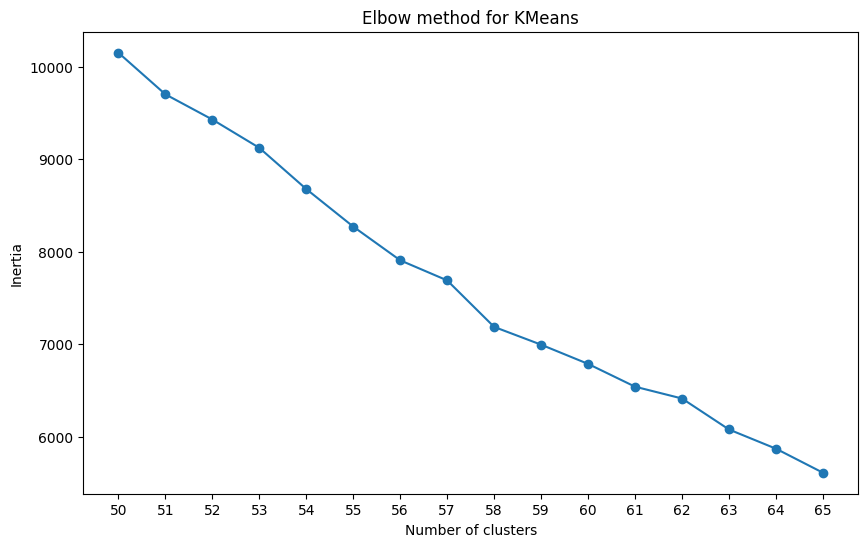

In [14]:
#Plot for the perfect cluster number
cluster_range = range(50, 66) 
inertia_subset = inertia[50:66]
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_subset, marker='o')
plt.title('Elbow method for KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.show()

In [15]:
print("Length of inertia array:", len(inertia))

Length of inertia array: 99


In [16]:
kmeans = KMeans(n_clusters = 54, random_state = 42, n_init = 'auto')
kmeans_labels = kmeans.fit_predict(X_scaled_with_countries)
kmeans_labels

array([48, 48, 48, ..., 17, 17, 17], dtype=int32)

In [17]:
# Calculate the silhouette score
score = silhouette_score(X_scaled_with_countries, kmeans_labels)
print("Silhouette score:", score)

Silhouette score: 0.6208672734963305


So, By using K-Means we get 62 Percentage Score.